In [1]:
import tarfile
import numpy as np
import matplotlib.pyplot as plt

# Power Model - on Worker node [192.168.58.68]

## Experiment Setup
```
### Config: [TurboBoostOn.HyperThreadOn, TurboBoostOff.HyperThreadOff]
### Iterations: 3
### Number CPUs: TurboBoostOn.HyperThreadOn -> [1 - 32], TurboBoostOff.HyperThreadOff-> [1 - 16]
### Workload: stress-ng --vm $i --vm-bytes 1500M --mmap $i --mmap-bytes 1500M --page-in -t 60s
```

## Experiment Run
```
For each Iterations, and Config above, I ran stress-ng for 60 seconds each with a different number of CPUs increasing from 1 to 32 or 16, depending on the Config. As it is running, I collected the power measurement using this tool: https://github.com/handong32/rapl-service, which spills the per package CPU and DRAM power reading into a file. Figures below are the result of this experiment.
```

In [2]:
def plot(axs, combofig):
    # Plot data on each subplot
    for i, ax in enumerate(axs.flat):
        print(combofig[i])
    
        iter=combofig[i][0]
        tbht=combofig[i][1]
        ncpus=combofig[i][2]
        
        x = []
        ycpu = []
        ycpu_std = []
        ydram = []
        ydram_std = []
        for ncpu in range(1, ncpus+1):
            fname = f"stress-ng.iter{iter}.numcpus{ncpu}.{tbht}.vm.60"
            print(f"🟢 🟢 Reading {fname} 🟢 🟢")
            f=tar.extractfile(fname)
            content=f.read()
            decoded_content = content.decode("utf-8")
            cpupkgs=[]
            drampkgs=[]
            for line in decoded_content.split("\n"):
                if len(line) > 0:
                    ll = line.split(" ")
                    if float(ll[0]) > 0.0 and float(ll[1]) > 0.0:
                        cpupkgs.append(float(ll[0]))
                        drampkgs.append(float(ll[1]))
            print(np.mean(np.array(cpupkgs)), np.std(np.array(cpupkgs)))
            x.append(ncpu)
            ycpu.append(np.mean(np.array(cpupkgs)))
            ycpu_std.append(np.std(np.array(cpupkgs)))
            ydram.append(np.mean(np.array(drampkgs)))
            ydram_std.append(np.std(np.array(drampkgs)))
        ax.errorbar(x, ycpu, yerr=ycpu_std, fmt='x', capsize=1, label="CPU Package")
        ax.errorbar(x, ydram, yerr=ydram_std, fmt='o', capsize=1, label="DRAM Package")
        ax.set_xlabel('VM Instances')
        ax.set_ylabel('Mean Package Power (W)')
        ax.set_ylim(bottom=0, top=450)
        ax.set_title(f"Iteration [{iter+1}], {tbht}, \n stress-ng --vm $i --vm-bytes -t 60s")
        ax.grid(True)
        ax.legend()
        #plt.show()
        
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
tar = tarfile.open("/users/gustinj/results/stress-ng-results.tar.gz")


[0, 'TurboOn.HyperThreadOn', 32]
🟢 🟢 Reading stress-ng.iter0.numcpus1.TurboOn.HyperThreadOn.vm.60 🟢 🟢
52.15478235 1.6172127352507855
🟢 🟢 Reading stress-ng.iter0.numcpus2.TurboOn.HyperThreadOn.vm.60 🟢 🟢
72.60660268965518 13.652169805278152
🟢 🟢 Reading stress-ng.iter0.numcpus3.TurboOn.HyperThreadOn.vm.60 🟢 🟢
88.95148350847457 8.420376439284462
🟢 🟢 Reading stress-ng.iter0.numcpus4.TurboOn.HyperThreadOn.vm.60 🟢 🟢
94.00080774193549 13.389572285929459
🟢 🟢 Reading stress-ng.iter0.numcpus5.TurboOn.HyperThreadOn.vm.60 🟢 🟢
75.98138661666667 30.484650009500925
🟢 🟢 Reading stress-ng.iter0.numcpus6.TurboOn.HyperThreadOn.vm.60 🟢 🟢
95.3491162063492 15.759484606680358
🟢 🟢 Reading stress-ng.iter0.numcpus7.TurboOn.HyperThreadOn.vm.60 🟢 🟢
94.68134760655738 14.78840600928972
🟢 🟢 Reading stress-ng.iter0.numcpus8.TurboOn.HyperThreadOn.vm.60 🟢 🟢
98.63987435000003 9.934353934568485
🟢 🟢 Reading stress-ng.iter0.numcpus9.TurboOn.HyperThreadOn.vm.60 🟢 🟢
103.06930468253968 17.04134846458194
🟢 🟢 Reading stress-ng.i

67.69750170491803 10.130700035222175
🟢 🟢 Reading stress-ng.iter2.numcpus6.TurboOff.HyperThreadOff.vm.60 🟢 🟢
75.46045903389829 5.6237752184142975
🟢 🟢 Reading stress-ng.iter2.numcpus7.TurboOff.HyperThreadOff.vm.60 🟢 🟢
64.00607813333333 12.803359157824167
🟢 🟢 Reading stress-ng.iter2.numcpus8.TurboOff.HyperThreadOff.vm.60 🟢 🟢
42.01591659375 13.923989300188827
🟢 🟢 Reading stress-ng.iter2.numcpus9.TurboOff.HyperThreadOff.vm.60 🟢 🟢
88.44088793333334 7.919610589032179
🟢 🟢 Reading stress-ng.iter2.numcpus10.TurboOff.HyperThreadOff.vm.60 🟢 🟢
74.05666203125001 11.295697044986678
🟢 🟢 Reading stress-ng.iter2.numcpus11.TurboOff.HyperThreadOff.vm.60 🟢 🟢
66.368273734375 11.582287379277657
🟢 🟢 Reading stress-ng.iter2.numcpus12.TurboOff.HyperThreadOff.vm.60 🟢 🟢
76.397460953125 13.442150374111945
🟢 🟢 Reading stress-ng.iter2.numcpus13.TurboOff.HyperThreadOff.vm.60 🟢 🟢
70.7895981875 11.57060892408022
🟢 🟢 Reading stress-ng.iter2.numcpus14.TurboOff.HyperThreadOff.vm.60 🟢 🟢
68.7368595625 12.675919952301427
🟢 🟢

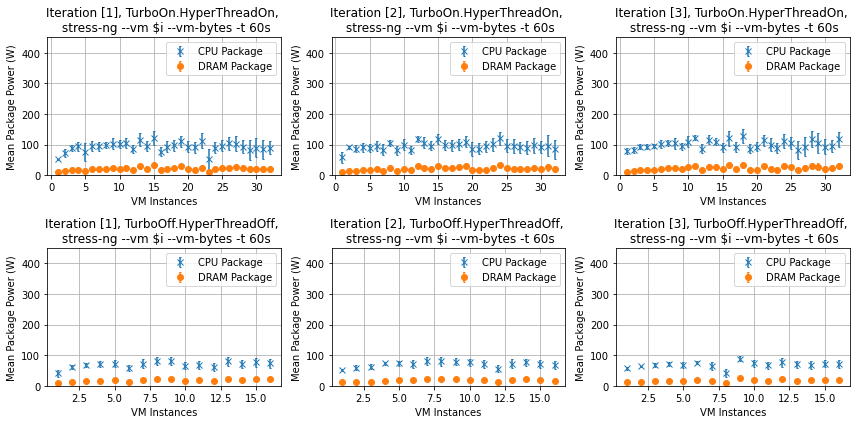

In [3]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

combofig = {0: [0, "TurboOn.HyperThreadOn", 32], 1: [1, "TurboOn.HyperThreadOn", 32], 2: [2, "TurboOn.HyperThreadOn", 32],
           3: [0, "TurboOff.HyperThreadOff", 16], 4: [1, "TurboOff.HyperThreadOff", 16], 5: [2, "TurboOff.HyperThreadOff", 16]}

plot(axs, combofig)

# Analysis of figures above
```
1) Top 3 figures has TurboBoost and HyperThread ON, and bottom 3 figures has them disabled
2) The X-axis Mean Package Power (W), is averaged over a 60 second run of stress-ng with an increasing number of CPUs set. There is also standard deviation shown as y-error bars for each mean power measurement.
3) There is a difference in Power between the two Configs (see figures below), with the config having TurboBoost and HyperThreading enabled averaging higher mean package power (~100 vs ~90) - perhaps the CPU frequency is boosted to support the stress-ng workload, we don't measure performance of stress-ng so its hard to say what is the performance-power trade-off in this scenario
```